# Imports 

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Model ,Sequential
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
sns.set_theme(style='darkgrid',palette='rainbow')
plt.rcParams['figure.figsize'] = (15,10)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">classify the Size_Categorie using SVM </h3>

# 2-Data collection and EDA

In [2]:
df = pd.read_csv('./gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
# I create attribute information dataframe
atrr = pd.read_csv('./gas_turbine_data.csv',index_col=1)
atrr

,Variable,Unit,Min,Max,Mean
Abbr,,,,,
AT,Ambient temperature,C,6.23,37.10,17.71
AP,Ambient pressure,mbar,985.85,1036.56,1013.07
AH,Ambient humidity,(%),24.08,100.20,77.87
AFDP,Air filter difference pressure,mbar,2.09,7.61,3.93
GTEP,Gas turbine exhaust pressure,mbar,17.70,40.72,25.56
TIT,Turbine inlet temperature,C,1000.85,1100.89,1081.43
TAT,Turbine after temperature,C,511.04,550.61,546.16
CDP,Compressor discharge pressure,mbar,9.85,15.16,12.06
TEY,Turbine energy yield,MWH,100.02,179.50,133.51


## check for null and duplicate

In [5]:
df.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [6]:
df[df.duplicated(keep=False)]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


<span style="color:blue; font-family: Arial;">No Null or duplicated fields</span>

## Statistical inference

<span style="color:red; font-family: Arial;">For our problem statement the variable TEY is our target</span>

In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<Axes: >

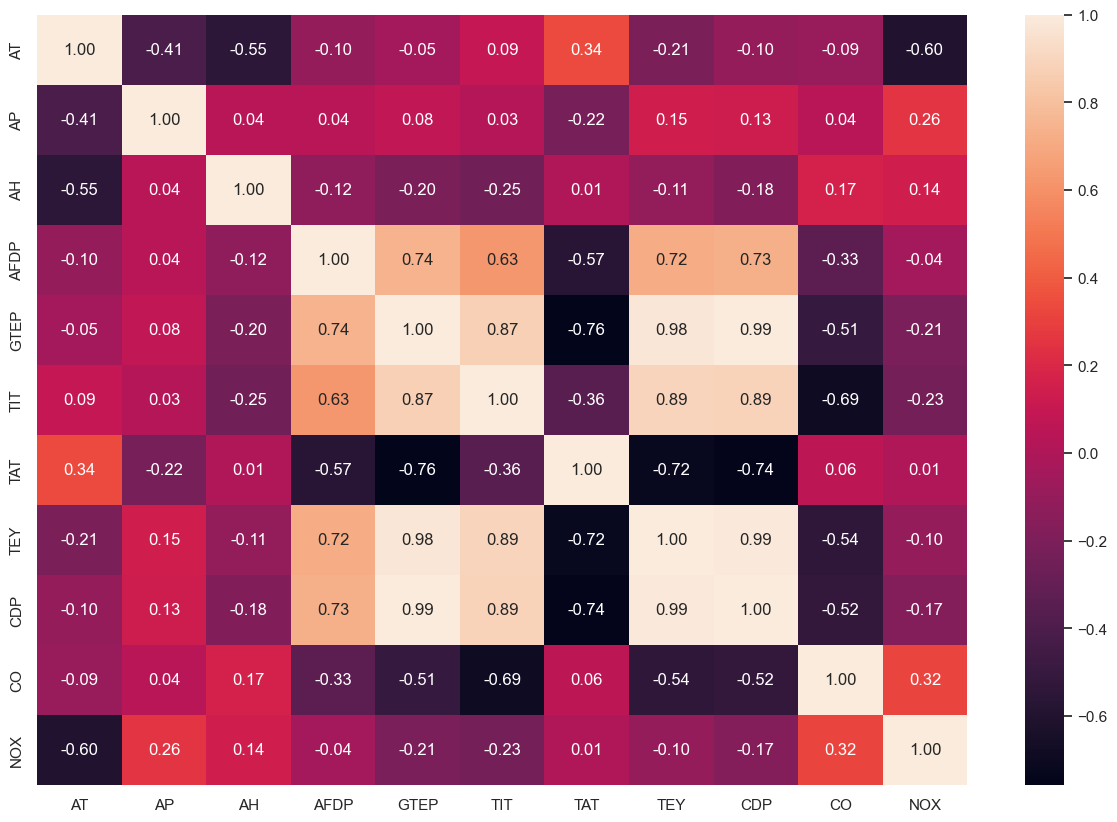

In [8]:
# Correlation plot
sns.heatmap(df.corr(),annot=True,fmt='.2f')

<span style="color:blue; font-family: Arial;">Many variables are highly positively correlated to our target column</span>


# 3 - Visualization

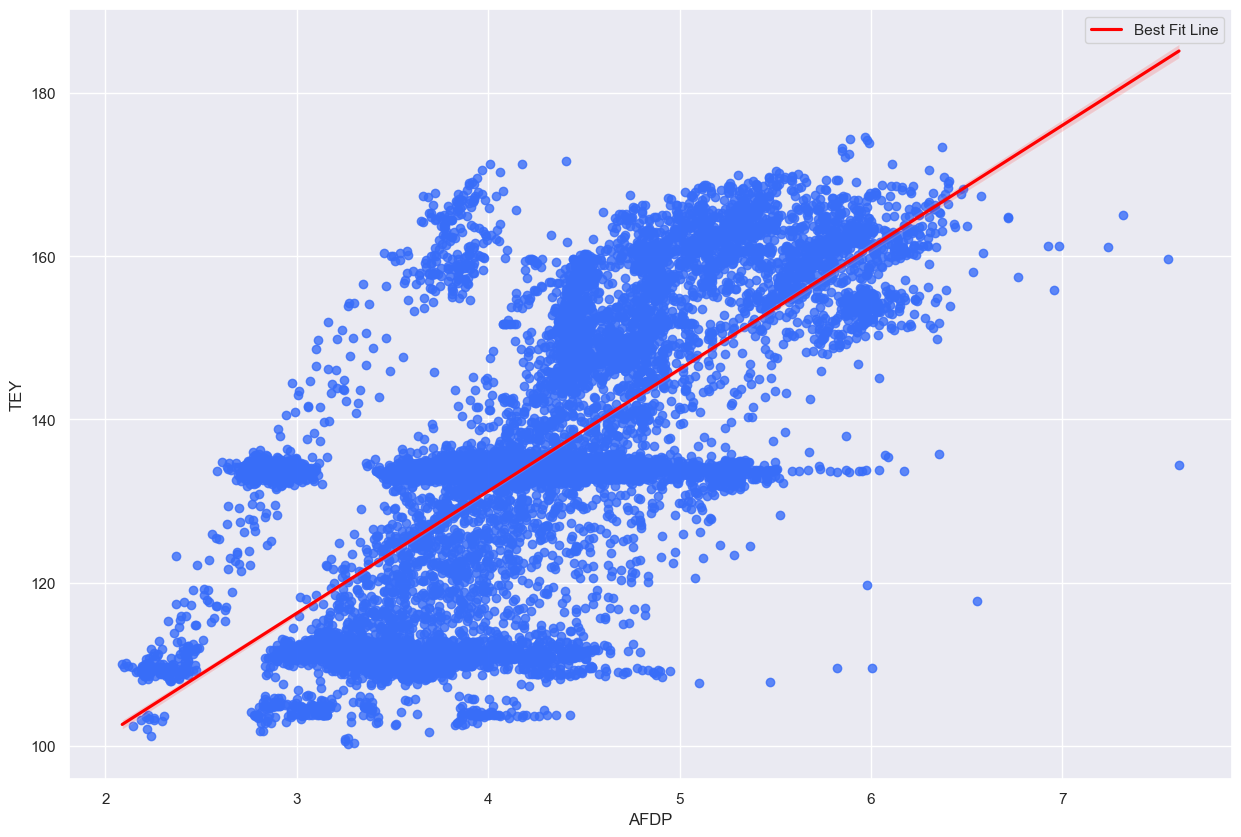

In [9]:
sns.regplot(x='AFDP', y='TEY', data=df,line_kws={'color':'red','label':'Best Fit Line'})
plt.legend()

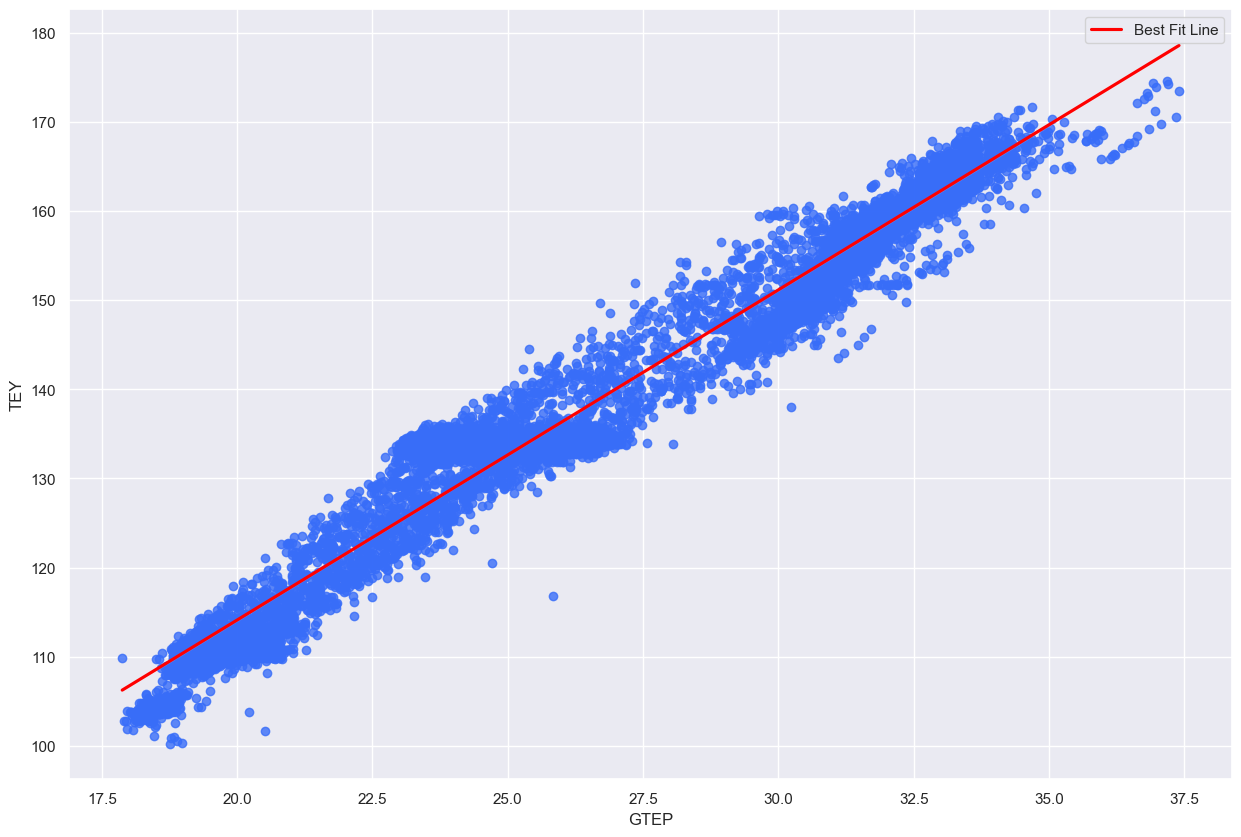

In [10]:
sns.regplot(x='GTEP', y='TEY', data=df,line_kws={'color':'red','label':'Best Fit Line'})
plt.legend()

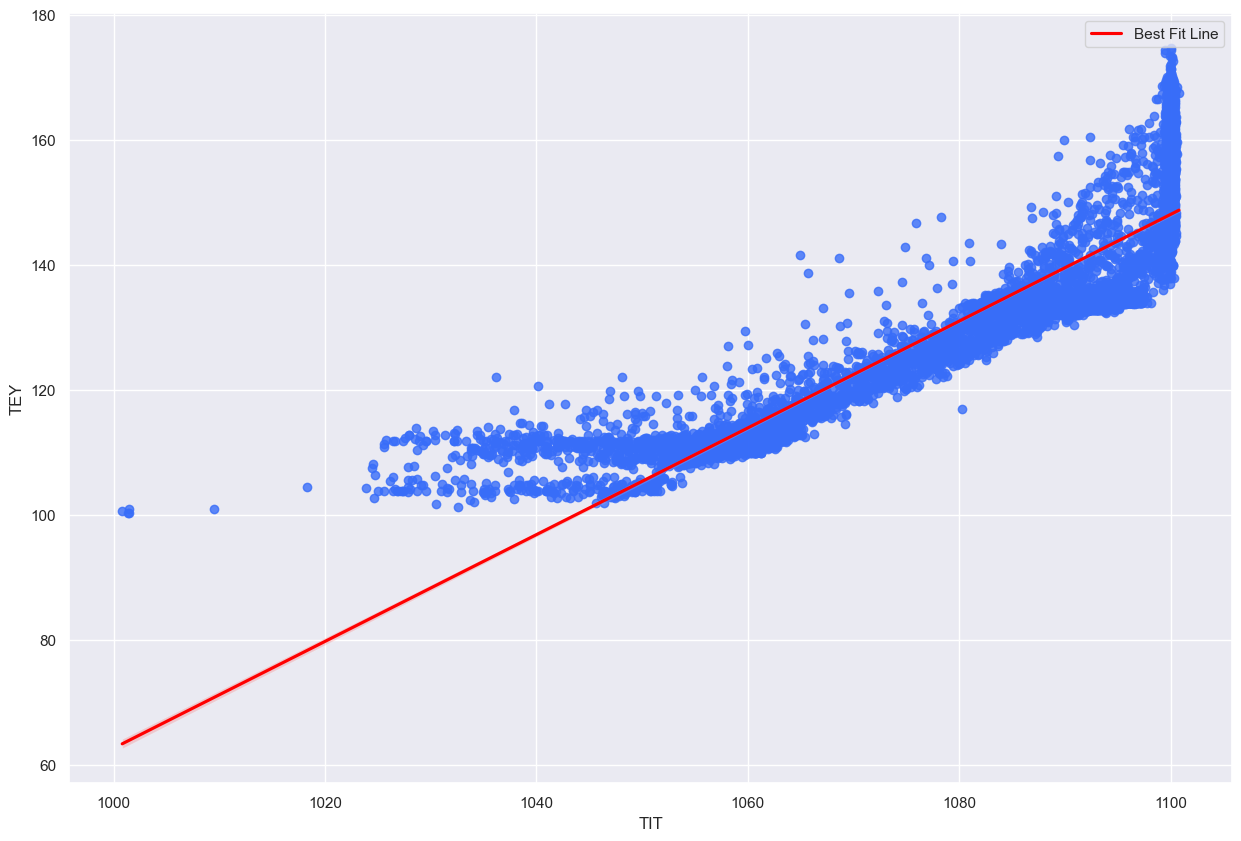

In [11]:
sns.regplot(x='TIT', y='TEY', data=df,line_kws={'color':'red','label':'Best Fit Line'})
plt.legend()

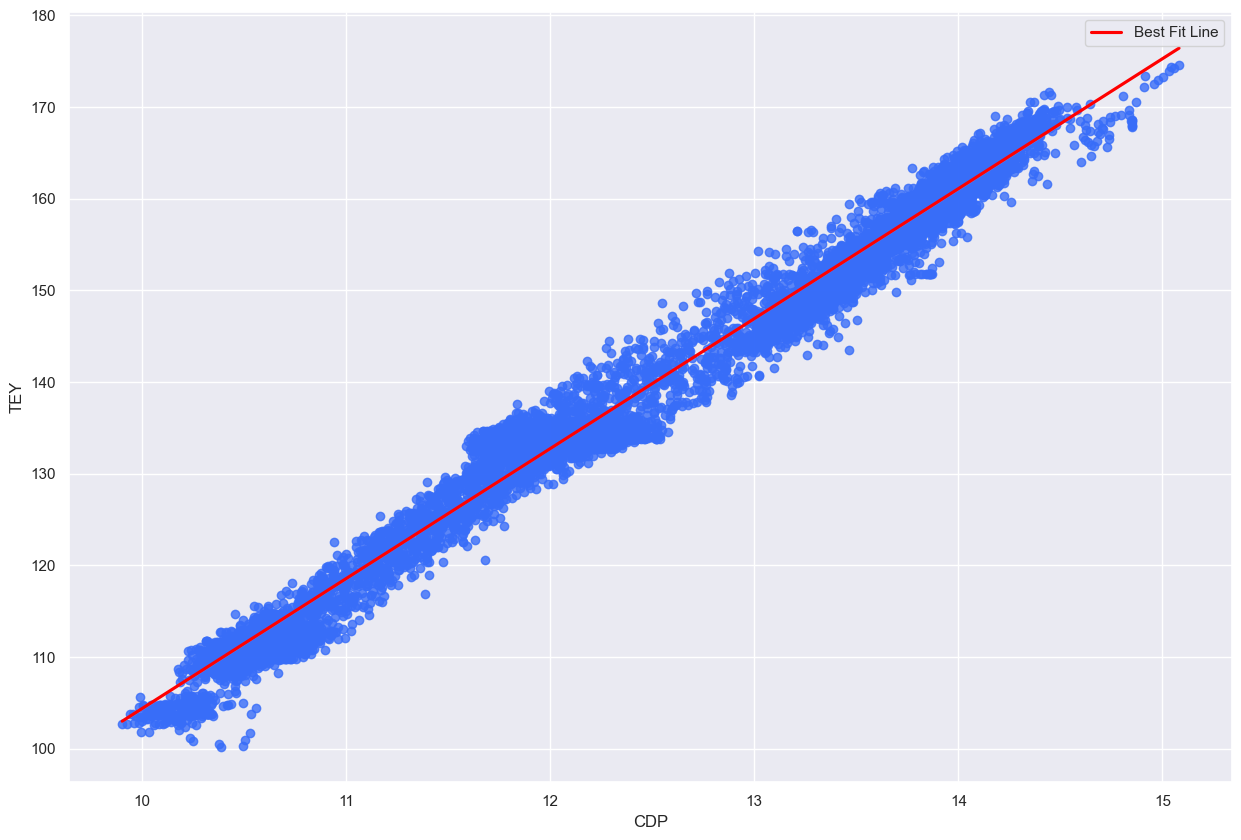

In [12]:
sns.regplot(x='CDP', y='TEY', data=df,line_kws={'color':'red','label':'Best Fit Line'})
plt.legend()

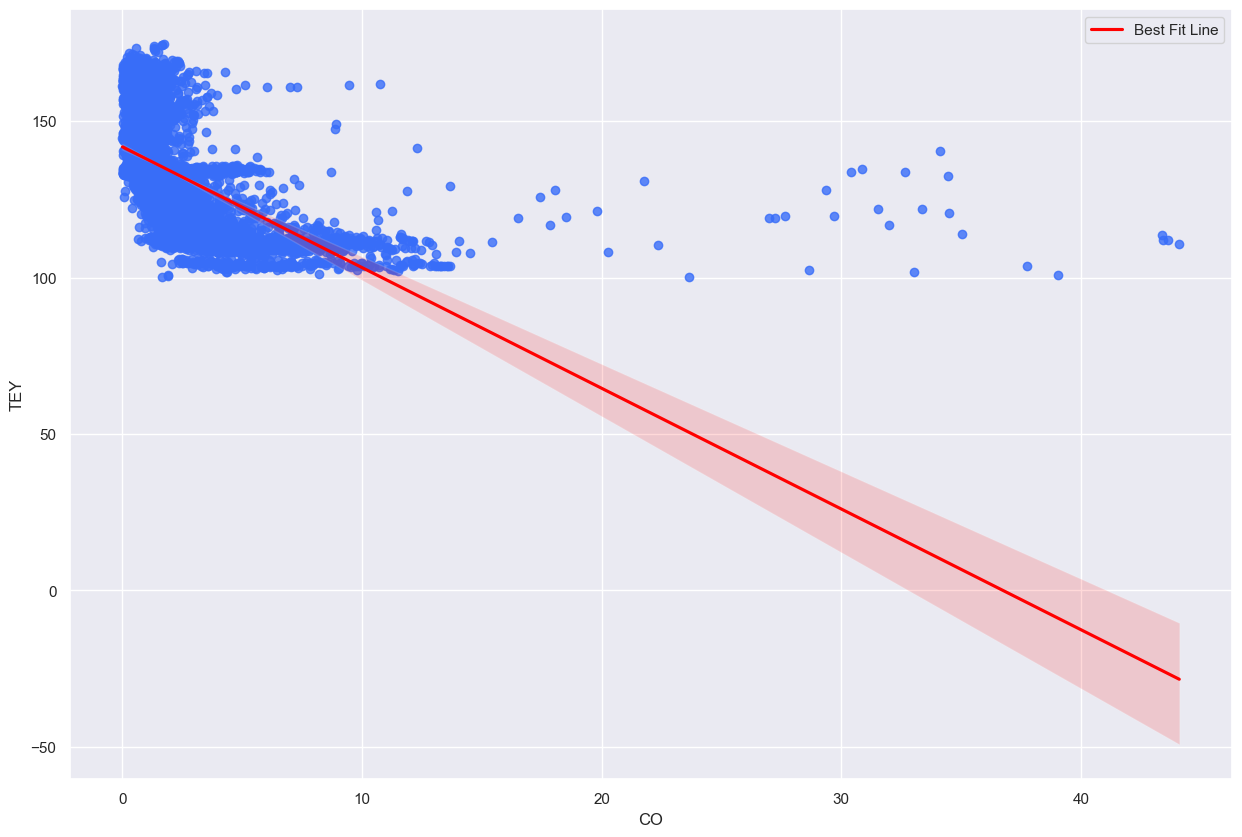

In [13]:
sns.regplot(x='CO', y='TEY', data=df,line_kws={'color':'red','label':'Best Fit Line'})
plt.legend()

<span style="color:blue; font-family: Arial;">These are some of the highly correlated variables</span>


<Axes: >

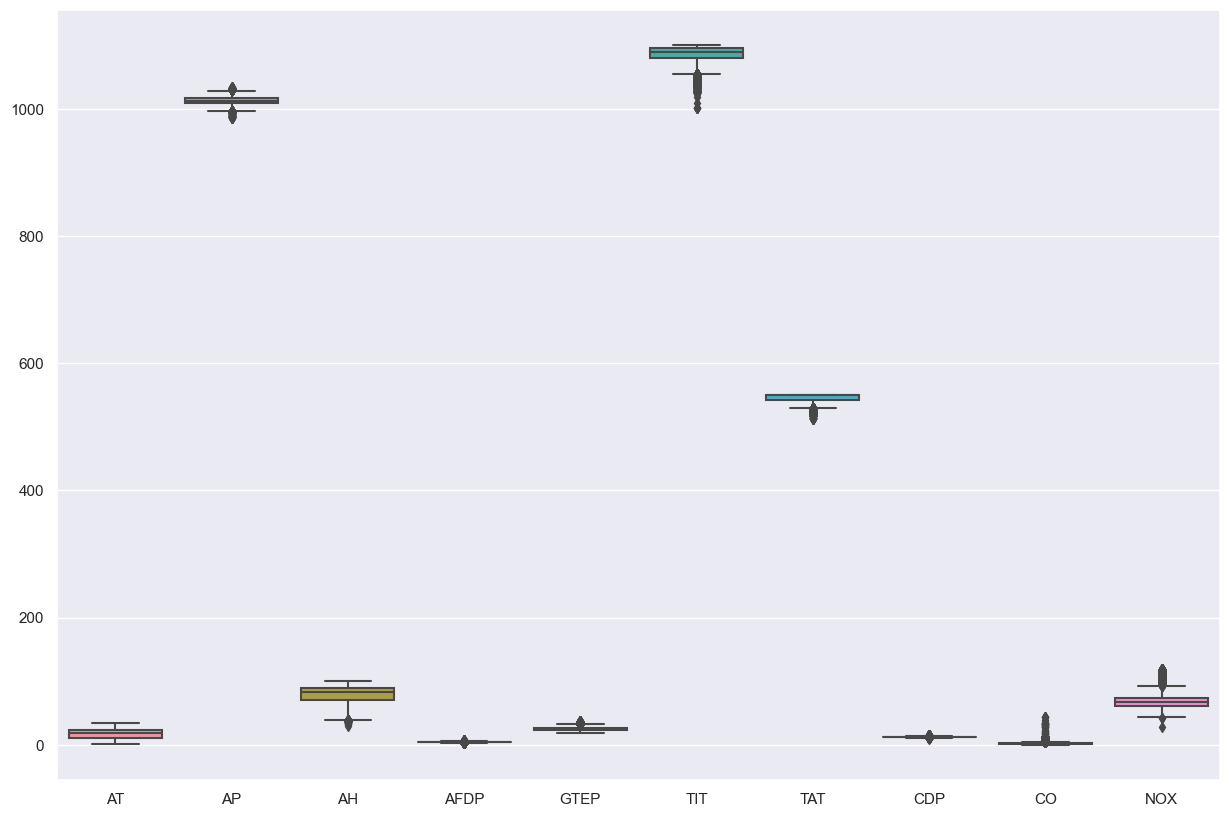

In [14]:
sns.boxplot(df[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']])

In [15]:
clf = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']
for i in clf:
    min_val = round(atrr.loc[i,'Min'],2)
    max_val = round(atrr.loc[i,'Max'],2)
    print(f"For Column {i} there are : \n {len(df[df[i]>max_val])} values that are greater than max value : {max_val} \n\
    {len(df[df[i]<min_val])} values that are less than min value : {min_val} \n")

For Column AT there are : 
 0 values that are greater than max value : 37.1 
    980 values that are less than min value : 6.23 

For Column AP there are : 
 0 values that are greater than max value : 1036.56 
    0 values that are less than min value : 985.85 

For Column AH there are : 
 0 values that are greater than max value : 100.2 
    0 values that are less than min value : 24.08 

For Column AFDP there are : 
 1 values that are greater than max value : 7.61 
    1 values that are less than min value : 2.09 

For Column GTEP there are : 
 0 values that are greater than max value : 40.72 
    0 values that are less than min value : 17.7 

For Column TIT there are : 
 0 values that are greater than max value : 1100.89 
    1 values that are less than min value : 1000.85 

For Column TAT there are : 
 0 values that are greater than max value : 550.61 
    0 values that are less than min value : 511.04 

For Column CDP there are : 
 0 values that are greater than max value : 15.16 

<span style="color:blue; font-family: Arial;">These are the outliers according to out attribute information given in the problem statement</span>

In [16]:
df.drop(index=df[df['AT']<6.23].index,inplace=True)

## DataPreprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('TEY',axis=1)
Y = df['TEY']

In [19]:
std = StandardScaler()
scaled = std.fit_transform(X)

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled,Y,test_size=0.2,random_state=42)

# 4 - Model

## Base model

*A simple 2 layer dense network is capable of modeling any linear relation so we are going to use this as baseline model*

In [21]:
x_in = tf.keras.Input(shape=(10))
x = tf.keras.layers.Dense(16,activation='relu')(x_in)
x = tf.keras.layers.Dense(1)(x)
model = Model(inputs=[x_in],outputs=[x])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MSE)

In [23]:
history = model.fit(xtrain,ytrain,batch_size=8,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
1406/1406 [==============================] - 3s 2ms/step - loss: 11883.6455 - val_loss: 3750.4624
Epoch 2/50
1406/1406 [==============================] - 2s 2ms/step - loss: 1340.3717 - val_loss: 380.0218
Epoch 3/50
1406/1406 [==============================] - 3s 2ms/step - loss: 260.6608 - val_loss: 194.8477
Epoch 4/50
1406/1406 [==============================] - 2s 2ms/step - loss: 158.3452 - val_loss: 124.4278
Epoch 5/50
1406/1406 [==============================] - 2s 2ms/step - loss: 102.4913 - val_loss: 83.6456
Epoch 6/50
1406/1406 [==============================] - 2s 2ms/step - loss: 69.4602 - val_loss: 58.8723
Epoch 7/50
1406/1406 [==============================] - 2s 2ms/step - loss: 49.9691 - val_loss: 43.5756
Epoch 8/50
1406/1406 [==============================] - 3s 2ms/step - loss: 37.0670 - val_loss: 32.1452
Epoch 9/50
1406/1406 [==============================] - 2s 2ms/step - loss: 27.4476 - val_loss: 23.8827
Epoch 10/50
1406/1406 [============================

<Axes: >

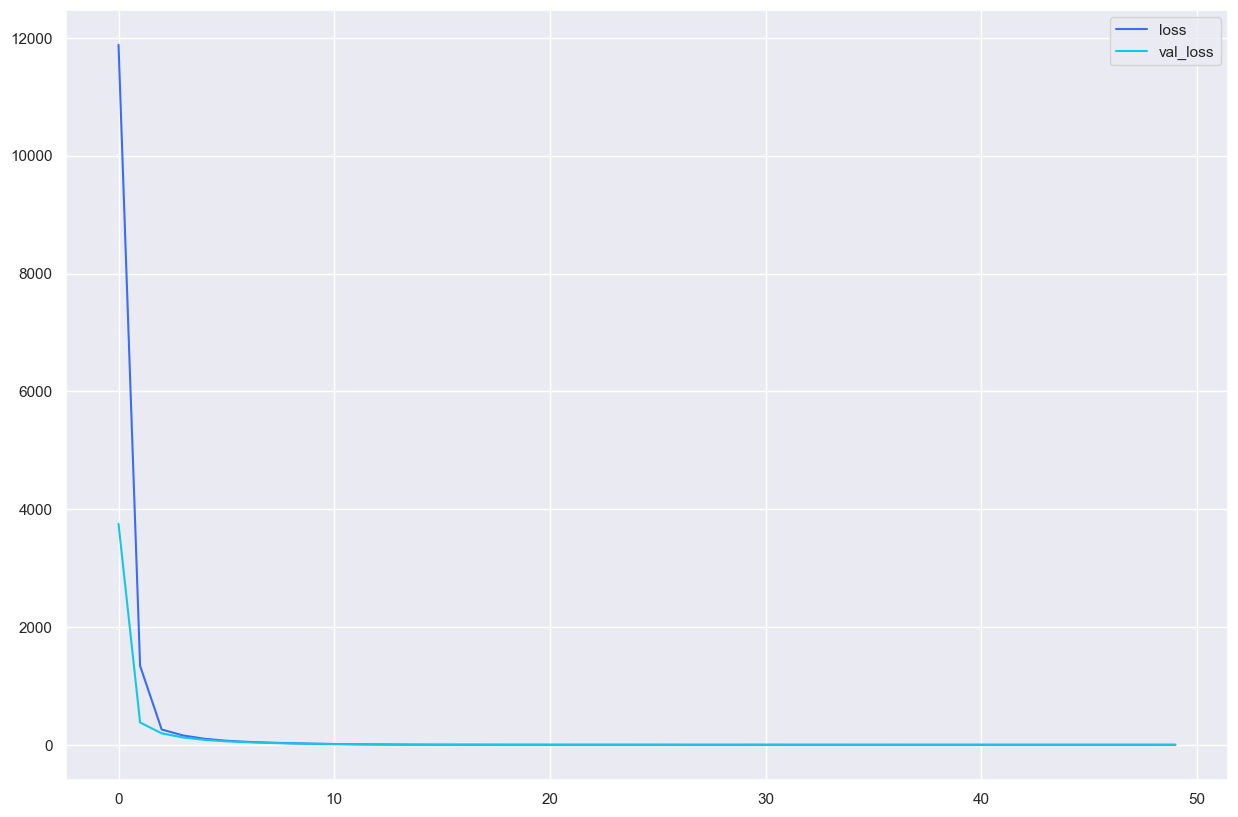

In [24]:
pd.DataFrame(history.history).plot(kind='line')

In [ ]:
r2_score(ytest,model.predict(xtest))

<span style="color:blue; font-family: Arial;">The Baseline model already performs better but still we will use some methods to finetune the model</span>


# 5 - HyperParameter Tuning

In [25]:
import keras_tuner as kt

In [26]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value = 1, max_value=10)):
        if counter == 0:
            model.add(tf.keras.layers.Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                           input_dim=10))
            counter = counter + 1
        else:
            model.add(tf.keras.layers.Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer= hp.Choice('Optimizer',values=['adam','rmsprop','sgd']),
                     loss = tf.keras.losses.MSE)
    return model

In [27]:
tuner = kt.RandomSearch(hyper,
                       objective='val_loss',
                        overwrite=True,
                       max_trials=3
                       )
tuner.search(xtrain,ytrain,epochs = 10 , validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 12s]
val_loss: 6.579489614973423e+29

Best val_loss So Far: 0.3747016489505768
Total elapsed time: 00h 00m 35s
INFO:tensorflow:Oracle triggered exit


In [28]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                528       
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 dense_2 (Dense)             (None, 88)                4312      
                                                                 
 dense_3 (Dense)             (None, 32)                2848      
                                                                 
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
 dense_6 (Dense)             (None, 96)                8

### Model with best score

In [29]:
x_in = tf.keras.layers.Input(shape=(10))
x = tf.keras.layers.Dense(40,activation='relu')(x_in)
x = tf.keras.layers.Dense(1,activation='linear')(x)
fmodel = Model(inputs=[x_in],outputs=[x])
fmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_9 (Dense)             (None, 40)                440       
                                                                 
 dense_10 (Dense)            (None, 1)                 41        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
fmodel.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MSE)

In [31]:
history = fmodel.fit(xtrain,ytrain,batch_size=8,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
1406/1406 [==============================] - 3s 2ms/step - loss: 9184.7861 - val_loss: 1227.1389
Epoch 2/50
1406/1406 [==============================] - 3s 2ms/step - loss: 440.6848 - val_loss: 222.6568
Epoch 3/50
1406/1406 [==============================] - 3s 2ms/step - loss: 166.8086 - val_loss: 124.1098
Epoch 4/50
1406/1406 [==============================] - 3s 2ms/step - loss: 95.2558 - val_loss: 74.9795
Epoch 5/50
1406/1406 [==============================] - 3s 2ms/step - loss: 58.7673 - val_loss: 48.7351
Epoch 6/50
1406/1406 [==============================] - 3s 2ms/step - loss: 38.5902 - val_loss: 31.9619
Epoch 7/50
1406/1406 [==============================] - 3s 2ms/step - loss: 25.0891 - val_loss: 19.6558
Epoch 8/50
1406/1406 [==============================] - 3s 2ms/step - loss: 15.6404 - val_loss: 11.8716
Epoch 9/50
1406/1406 [==============================] - 3s 2ms/step - loss: 9.7177 - val_loss: 7.4024
Epoch 10/50
1406/1406 [==============================] - 3

<Axes: >

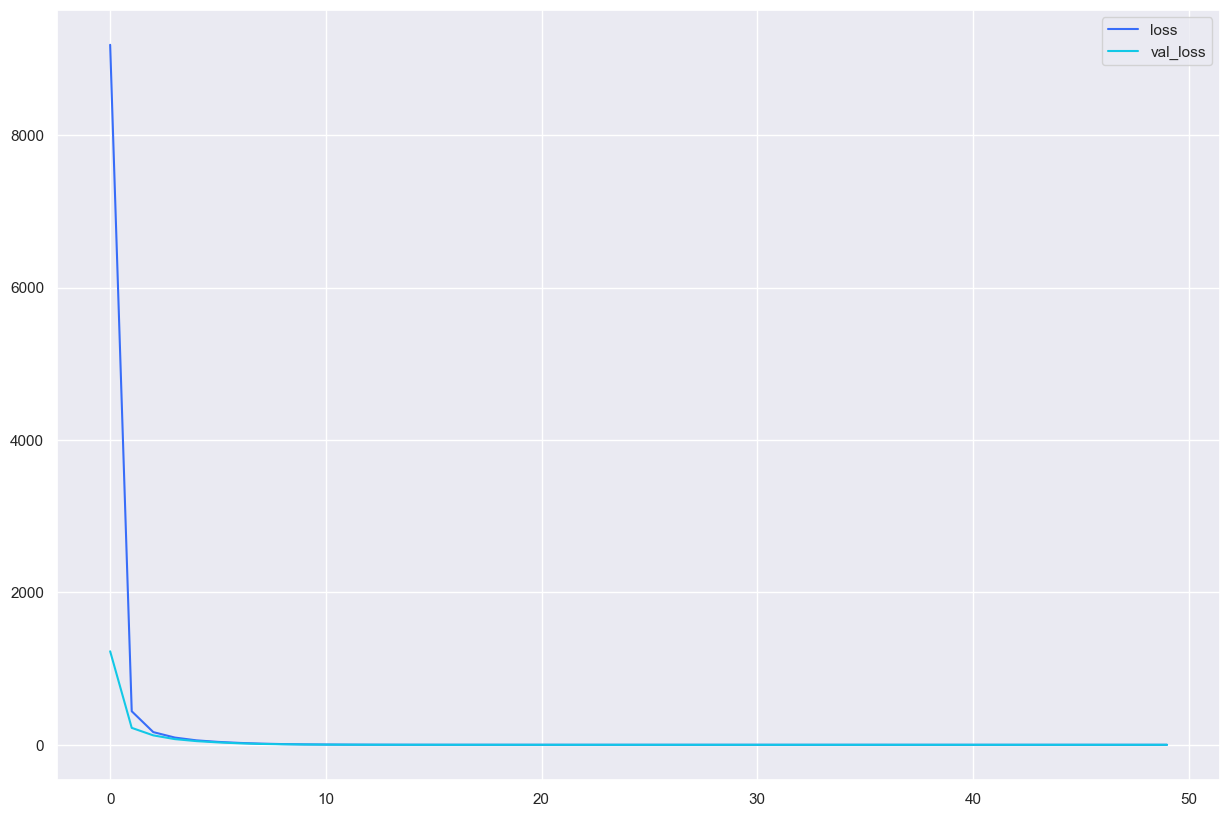

In [32]:
pd.DataFrame(history.history).plot(kind='line')

In [33]:
r2_score(ytest,fmodel.predict(xtest))

88/88 [==============================] - 0s 1ms/step


0.9981894537751682